In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def getdata(url):
    r = requests.get(url)
    return r.text

In [3]:
def html_code(url):
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    return (soup)

In [4]:
url="https://www.amazon.in/Fire-Boltt-Smartwatch-Assistance-Calculator-Monitoring/product-reviews/B0B3MYPX74/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent"
soup = html_code(url)
print(soup)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5

In [5]:
def cus_data(soup):
    
    cus_list = []
  
    for item in soup.find_all("span", class_ ="a-profile-name"):
        cus_list.append(item.get_text())
    return cus_list

In [6]:
cus_res = cus_data(soup)
for i in range(2):
    cus_res.pop(0)
print(cus_res)

['Chawan Sha', 'Vijayendhra', 'VILAS MESHRAM', 'Madhu sudan', 'Simran K.', 'Sourabh Jerath', 'Rohan', 'Anubhav', 'Biplab kumar', 'Mahesh M']


In [7]:
len(cus_res)

10

In [8]:
def cus_rev(soup):
    
    data_str = ""
  
    for item in soup.find_all('a',class_='review-title-content'):
        data_str = data_str + item.get_text()
    
    result = data_str.split("\n")
    return (result)
  

rev_data = cus_rev(soup)
rev_result = []
for i in rev_data:
    if i == "":
        pass
    else:
        rev_result.append(i)
rev_result

['It need to be made compatible',
 'Nice and good experience',
 'Excellent product',
 'I get the defaulted one',
 'Loved the watch',
 'Value for money',
 'The touch quality is so good I like it and strip quality is best AI is also good',
 'Good product',
 'Smart Watch',
 'Best smartwatch in this price range']

In [9]:
import pandas as pd
reviews=list(zip(cus_res, rev_result))
print(reviews)

[('Chawan Sha', 'It need to be made compatible'), ('Vijayendhra', 'Nice and good experience'), ('VILAS MESHRAM', 'Excellent product'), ('Madhu sudan', 'I get the defaulted one'), ('Simran K.', 'Loved the watch'), ('Sourabh Jerath', 'Value for money'), ('Rohan', 'The touch quality is so good I like it and strip quality is best AI is also good'), ('Anubhav', 'Good product'), ('Biplab kumar', 'Smart Watch'), ('Mahesh M', 'Best smartwatch in this price range')]


In [10]:
len(cus_res)

10

In [11]:
len(rev_result)

10

In [12]:
reviews_df=pd.DataFrame(reviews, columns=["Name", "Reviews"])
reviews_df

,Name,Reviews
0,Chawan Sha,It need to be made compatible
1,Vijayendhra,Nice and good experience
2,VILAS MESHRAM,Excellent product
3,Madhu sudan,I get the defaulted one
4,Simran K.,Loved the watch
5,Sourabh Jerath,Value for money
6,Rohan,The touch quality is so good I like it and str...
7,Anubhav,Good product
8,Biplab kumar,Smart Watch
9,Mahesh M,Best smartwatch in this price range


In [13]:
urls="https://www.amazon.in/Fire-Boltt-Smartwatch-Assistance-Calculator-Monitoring/product-reviews/B0B3MYPX74/ref=cm_cr_getr_d_paging_btm_next_"
urls1="?ie=UTF8&reviewerType=all_reviews&pageNumber="
urls_list=[]
for i in range(1,200):
    urls_list.append(urls+str(i)+urls1+str(i)+"&sortBy=recent")

In [14]:
urls_list[0]

'https://www.amazon.in/Fire-Boltt-Smartwatch-Assistance-Calculator-Monitoring/product-reviews/B0B3MYPX74/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent'

In [15]:
len(urls_list)

199

In [16]:
for i in range(198):
    soup = html_code(urls_list[i])
    cus_names = cus_data(soup)
    for i in range(2,len(cus_names)):
        cus_res.append(cus_names[i])
print(cus_res)

['Chawan Sha', 'Vijayendhra', 'VILAS MESHRAM', 'Madhu sudan', 'Simran K.', 'Sourabh Jerath', 'Rohan', 'Anubhav', 'Biplab kumar', 'Mahesh M', 'Chawan Sha', 'Vijayendhra', 'VILAS MESHRAM', 'Madhu sudan', 'Simran K.', 'Sourabh Jerath', 'Rohan', 'Anubhav', 'Biplab kumar', 'Mahesh M', 'muruganantham', 'Preeti', 'Sridhar', 'KARTHIK REDDY', 'AKHIL', 'Regu  ajitha', 'Ravi', 'Krishnaakant pandey', 'Nitin bhatia', 'Shafi', 'sanjoy chakraborty', 'Bharath', 'K RAM KUMAR', 'Yasha Y.', 'Sri Vyshnavi', 'Naval s.', 'Atharva D.', 'Ashwatha  E S', 'Maulik r.', 'Garima maurya', 'Ramesh', 'Chandan Pandey', 'lalman yadav', 'Guri', 'Suman dey', 'Deependra choudhary', 'Anjesh Singh', 'Tammali Lasya priya', 'Sharath kumar V', 'raju s.', 'Amazon Customer', 'Fahmida', 'Arvind Kumar agrawal', 'javeed sk', 'Raj', 'KrishnaKumar', 'Inamulhasan khanat', 'Wasif', 'MUHAMMED anshaj', 'Promila sihmar', 'Ravi', 'sai', 'Aadee', 'Deva Dasher', 'amit', 'sandip ghosh', 'Ranjit Kumar', 'Mohseen', 'Suresh Kasi', 'Hari', 'Govin

In [17]:
len(cus_res)

850

In [18]:
urls_list[0]

'https://www.amazon.in/Fire-Boltt-Smartwatch-Assistance-Calculator-Monitoring/product-reviews/B0B3MYPX74/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1&sortBy=recent'

In [19]:
rev_result = []
for i in range(198):
    soup = html_code(urls_list[i])
    rev_data = cus_rev(soup)
    for i in rev_data:
        if i == "":
            pass
        else:
            rev_result.append(i)
rev_result

['Nice watch',
 'Fire bolt watch',
 'Very impressive',
 'Good watch',
 'Awesome one',
 'Not good',
 'Good Smartwatch but gps tracking missing',
 'Great reviews',
 'Picture',
 'Not worth purchasing',
 'Nice Watch.',
 'The screen is 1.8 inch larger',
 'Good Product must buy',
 'Loved it.',
 'Must Try Watch',
 'Review',
 'Speaker Problem',
 'Satisfactory',
 'good for budget watch',
 'Awesome',
 'Amazon 🔥 bolt ring 3',
 'nice product',
 'Osm product',
 'Product Quality',
 'Awesome Product',
 'Amazing and value for money product',
 'Value for Money',
 'Nice product, worth of money',
 'Amazing product',
 'Good Product',
 'Awesome',
 'good looking',
 'Just started to use, looks good as of now',
 'Superb product',
 'A GOOD PRODUCT LIKE IT VERY MUCH BUT ONLY ONE PROBLEM I SEE THAT THE SLEEP TRACKING IS NOT ACCURATE',
 'Very Nice looking',
 'Super smart watch',
 'Best smartwatch',
 'Great looking',
 'It’s really awesome',
 'nice watch',
 "It's a good product to use loved it ❣️",
 'Great product'

In [20]:
len(rev_result)

800

In [21]:
reviews=list(zip(cus_res, rev_result))
print(reviews)

[('Chawan Sha', 'Nice watch'), ('Vijayendhra', 'Fire bolt watch'), ('VILAS MESHRAM', 'Very impressive'), ('Madhu sudan', 'Good watch'), ('Simran K.', 'Awesome one'), ('Sourabh Jerath', 'Not good'), ('Rohan', 'Good Smartwatch but gps tracking missing'), ('Anubhav', 'Great reviews'), ('Biplab kumar', 'Picture'), ('Mahesh M', 'Not worth purchasing'), ('Chawan Sha', 'Nice Watch.'), ('Vijayendhra', 'The screen is 1.8 inch larger'), ('VILAS MESHRAM', 'Good Product must buy'), ('Madhu sudan', 'Loved it.'), ('Simran K.', 'Must Try Watch'), ('Sourabh Jerath', 'Review'), ('Rohan', 'Speaker Problem'), ('Anubhav', 'Satisfactory'), ('Biplab kumar', 'good for budget watch'), ('Mahesh M', 'Awesome'), ('muruganantham', 'Amazon 🔥 bolt ring 3'), ('Preeti', 'nice product'), ('Sridhar', 'Osm product'), ('KARTHIK REDDY', 'Product Quality'), ('AKHIL', 'Awesome Product'), ('Regu  ajitha', 'Amazing and value for money product'), ('Ravi', 'Value for Money'), ('Krishnaakant pandey', 'Nice product, worth of mone

In [22]:
reviews_df=pd.DataFrame(reviews, columns=["Name", "comment"])
reviews_df

,Name,comment
0,Chawan Sha,Nice watch
1,Vijayendhra,Fire bolt watch
2,VILAS MESHRAM,Very impressive
3,Madhu sudan,Good watch
4,Simran K.,Awesome one
...,...,...
795,Rahul kumar Rex,Good
796,Nicku nagpal,Nice watch
797,Manoj chandra,nic
798,Neha,Value for money.


In [23]:
reviews=reviews_df
reviews

,Name,comment
0,Chawan Sha,Nice watch
1,Vijayendhra,Fire bolt watch
2,VILAS MESHRAM,Very impressive
3,Madhu sudan,Good watch
4,Simran K.,Awesome one
...,...,...
795,Rahul kumar Rex,Good
796,Nicku nagpal,Nice watch
797,Manoj chandra,nic
798,Neha,Value for money.


In [24]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Nice watch',
 'Fire bolt watch',
 'Very impressive',
 'Good watch',
 'Awesome one',
 'Not good',
 'Good Smartwatch but gps tracking missing',
 'Great reviews',
 'Picture',
 'Not worth purchasing']

In [25]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Nice watch Fire bolt watch Very impressive Good watch Awesome one Not good Good Smartwatch but gps tracking missing Great reviews Picture Not worth purchasing Nice Watch. The screen is 1.8 inch larger Good Product must buy Loved it. Must Try Watch Review Speaker Problem Satisfactory good for budget watch Awesome Amazon 🔥 bolt ring 3 nice product Osm product Product Quality Awesome Product Amazing and value for money product Value for Money Nice product, worth of money Amazing product Good Product Awesome good looking Just started to use, looks good as of now Superb product A GOOD PRODUCT LIKE IT VERY MUCH BUT ONLY ONE PROBLEM I SEE THAT THE SLEEP TRACKING IS NOT ACCURATE Very Nice looking Super smart watch Best smartwatch Great looking It’s really awesome nice watch It\'s a good product to use loved it ❣️ Great product Stylish one Good value for money watch with awesome features. Mind blowing purchase Really good smartwatch Best smart watch ever Very good product Lovely Larger Display

In [26]:
# Remove Punctuations 
import string
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Nice watch Fire bolt watch Very impressive Good watch Awesome one Not good Good Smartwatch but gps tracking missing Great reviews Picture Not worth purchasing Nice Watch The screen is 18 inch larger Good Product must buy Loved it Must Try Watch Review Speaker Problem Satisfactory good for budget watch Awesome Amazon 🔥 bolt ring 3 nice product Osm product Product Quality Awesome Product Amazing and value for money product Value for Money Nice product worth of money Amazing product Good Product Awesome good looking Just started to use looks good as of now Superb product A GOOD PRODUCT LIKE IT VERY MUCH BUT ONLY ONE PROBLEM I SEE THAT THE SLEEP TRACKING IS NOT ACCURATE Very Nice looking Super smart watch Best smartwatch Great looking It’s really awesome nice watch Its a good product to use loved it ❣️ Great product Stylish one Good value for money watch with awesome features Mind blowing purchase Really good smartwatch Best smart watch ever Very good product Lovely Larger Display SmartWa

In [27]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Nice', 'watch', 'Fire', 'bolt', 'watch', 'Very', 'impressive', 'Good', 'watch', 'Awesome', 'one', 'Not', 'good', 'Good', 'Smartwatch', 'but', 'gps', 'tracking', 'missing', 'Great', 'reviews', 'Picture', 'Not', 'worth', 'purchasing', 'Nice', 'Watch', 'The', 'screen', 'is', '18', 'inch', 'larger', 'Good', 'Product', 'must', 'buy', 'Loved', 'it', 'Must', 'Try', 'Watch', 'Review', 'Speaker', 'Problem', 'Satisfactory', 'good', 'for', 'budget', 'watch']


In [29]:
len(text_tokens)

2913

In [30]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Nice', 'watch', 'Fire', 'bolt', 'watch', 'Very', 'impressive', 'Good', 'watch', 'Awesome', 'one', 'Not', 'good', 'Good', 'Smartwatch', 'gps', 'tracking', 'missing', 'Great', 'reviews', 'Picture', 'Not', 'worth', 'purchasing', 'Nice', 'Watch', 'screen', '18', 'inch', 'larger', 'Good', 'Product', 'must', 'buy', 'Loved', 'Must', 'Try', 'Watch', 'Review', 'Speaker', 'Problem', 'Satisfactory', 'good', 'budget', 'watch', 'Awesome', 'Amazon', '🔥', 'bolt', 'ring', '3', 'nice', 'product', 'Osm', 'product', 'Product', 'Quality', 'Awesome', 'Product', 'Amazing', 'value', 'money', 'product', 'Value', 'Money', 'Nice', 'product', 'worth', 'money', 'Amazing', 'product', 'Good', 'Product', 'Awesome', 'good', 'looking', 'Just', 'started', 'use', 'looks', 'good', 'Superb', 'product', 'GOOD', 'PRODUCT', 'LIKE', 'IT', 'VERY', 'MUCH', 'BUT', 'ONLY', 'ONE', 'PROBLEM', 'SEE', 'THAT', 'THE', 'SLEEP', 'TRACKING', 'IS', 'NOT', 'ACCURATE', 'Very', 'Nice', 'looking', 'Super', 'smart', 'watch', 'Best', 'smartwat

In [31]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['nice', 'watch', 'fire', 'bolt', 'watch', 'very', 'impressive', 'good', 'watch', 'awesome', 'one', 'not', 'good', 'good', 'smartwatch', 'gps', 'tracking', 'missing', 'great', 'reviews', 'picture', 'not', 'worth', 'purchasing', 'nice', 'watch', 'screen', '18', 'inch', 'larger', 'good', 'product', 'must', 'buy', 'loved', 'must', 'try', 'watch', 'review', 'speaker', 'problem', 'satisfactory', 'good', 'budget', 'watch', 'awesome', 'amazon', '🔥', 'bolt', 'ring', '3', 'nice', 'product', 'osm', 'product', 'product', 'quality', 'awesome', 'product', 'amazing', 'value', 'money', 'product', 'value', 'money', 'nice', 'product', 'worth', 'money', 'amazing', 'product', 'good', 'product', 'awesome', 'good', 'looking', 'just', 'started', 'use', 'looks', 'good', 'superb', 'product', 'good', 'product', 'like', 'it', 'very', 'much', 'but', 'only', 'one', 'problem', 'see', 'that', 'the', 'sleep', 'tracking', 'is', 'not', 'accurate', 'very', 'nice', 'looking', 'super', 'smart', 'watch', 'best', 'smartwat

In [32]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['nice', 'watch', 'fire', 'bolt', 'watch', 'veri', 'impress', 'good', 'watch', 'awesom', 'one', 'not', 'good', 'good', 'smartwatch', 'gp', 'track', 'miss', 'great', 'review', 'pictur', 'not', 'worth', 'purchas', 'nice', 'watch', 'screen', '18', 'inch', 'larger', 'good', 'product', 'must', 'buy', 'love', 'must', 'tri', 'watch', 'review', 'speaker', 'problem', 'satisfactori', 'good', 'budget', 'watch', 'awesom', 'amazon', '🔥', 'bolt', 'ring', '3', 'nice', 'product', 'osm', 'product', 'product', 'qualiti', 'awesom', 'product', 'amaz', 'valu', 'money', 'product', 'valu', 'money', 'nice', 'product', 'worth', 'money', 'amaz', 'product', 'good', 'product', 'awesom', 'good', 'look', 'just', 'start', 'use', 'look', 'good', 'superb', 'product', 'good', 'product', 'like', 'it', 'veri', 'much', 'but', 'onli', 'one', 'problem', 'see', 'that', 'the', 'sleep', 'track', 'is', 'not', 'accur', 'veri', 'nice', 'look', 'super', 'smart', 'watch', 'best', 'smartwatch', 'great', 'look', '’', 'realli', 'aweso

In [33]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

nice watch fire bolt watch very impressive good watch awesome one not good good smartwatch gps tracking missing great reviews picture not worth purchasing nice watch screen 18 inch larger good product must buy loved must try watch review speaker problem satisfactory good budget watch awesome amazon 🔥 bolt ring 3 nice product osm product product quality awesome product amazing value money product value money nice product worth money amazing product good product awesome good looking just started use looks good superb product good product like it very much but only one problem see that the sleep tracking is not accurate very nice looking super smart watch best smartwatch great looking ’ really awesome nice watch its good product use loved ❣️ great product stylish one good value money watch awesome features mind blowing purchase really good smartwatch best smart watch ever very good product lovely larger display smartwatch from fire bolty ❣️ its best price range ring 3 review nice product 

In [34]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['nice', 'watch', 'fire', 'bolt', 'watch', 'very', 'impressive', 'good', 'watch', 'awesome', 'one', 'not', 'good', 'good', 'smartwatch', 'gps', 'track', 'miss', 'great', 'review', 'picture', 'not', 'worth', 'purchase', 'nice', 'watch', 'screen', '18', 'inch', 'large', 'good', 'product', 'must', 'buy', 'love', 'must', 'try', 'watch', 'review', 'speaker', 'problem', 'satisfactory', 'good', 'budget', 'watch', 'awesome', 'amazon', '🔥', 'bolt', 'ring', '3', 'nice', 'product', 'osm', 'product', 'product', 'quality', 'awesome', 'product', 'amazing', 'value', 'money', 'product', 'value', 'money', 'nice', 'product', 'worth', 'money', 'amazing', 'product', 'good', 'product', 'awesome', 'good', 'looking', 'just', 'start', 'use', 'look', 'good', 'superb', 'product', 'good', 'product', 'like', 'it', 'very', 'much', 'but', 'only', 'one', 'problem', 'see', 'that', 'the', 'sleep', 'tracking', 'be', 'not', 'accurate', 'very', 'nice', 'look', 'super', 'smart', 'watch', 'good', 'smartwatch', 'great', 'lo

In [35]:
clean_reviews=' '.join(lemmas)
clean_reviews

"nice watch fire bolt watch very impressive good watch awesome one not good good smartwatch gps track miss great review picture not worth purchase nice watch screen 18 inch large good product must buy love must try watch review speaker problem satisfactory good budget watch awesome amazon 🔥 bolt ring 3 nice product osm product product quality awesome product amazing value money product value money nice product worth money amazing product good product awesome good looking just start use look good superb product good product like it very much but only one problem see that the sleep tracking be not accurate very nice look super smart watch good smartwatch great looking ' really awesome nice watch its good product use love ❣ ️ great product stylish one good value money watch awesome feature mind blow purchase really good smartwatch good smart watch ever very good product lovely large display smartwatch from fire bolty ❣ ️ its good price range ring 3 review nice product good product not abl

# CountVectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [37]:
print(cv.vocabulary_)

{'nice': 257, 'watch': 424, 'fire': 150, 'bolt': 62, 'very': 414, 'impressive': 198, 'good': 172, 'awesome': 39, 'one': 265, 'not': 260, 'smartwatch': 353, 'gps': 174, 'track': 398, 'miss': 244, 'great': 175, 'review': 330, 'picture': 285, 'worth': 441, 'purchase': 310, 'screen': 340, '18': 2, 'inch': 202, 'large': 219, 'product': 302, 'must': 252, 'buy': 73, 'love': 235, 'try': 401, 'speaker': 360, 'problem': 301, 'satisfactory': 337, 'budget': 69, 'amazon': 22, 'ring': 332, 'osm': 271, 'quality': 311, 'amazing': 21, 'value': 413, 'money': 245, 'looking': 233, 'just': 214, 'start': 365, 'use': 407, 'look': 232, 'superb': 372, 'like': 227, 'it': 209, 'much': 250, 'but': 71, 'only': 267, 'see': 341, 'that': 383, 'the': 384, 'sleep': 350, 'tracking': 400, 'be': 49, 'accurate': 9, 'super': 371, 'smart': 352, 'really': 317, 'its': 211, 'stylish': 368, 'feature': 142, 'mind': 243, 'blow': 57, 'ever': 126, 'lovely': 236, 'display': 119, 'from': 160, 'bolty': 64, 'price': 295, 'range': 313, '

In [38]:
print(cv.get_feature_names()[150:300])

['fire', 'firebolt', 'fireboltt', 'first', 'fit', 'flaunt', 'flickering', 'for', 'fresh', 'friendly', 'from', 'frst', 'fulfilling', 'full', 'fully', 'function', 'gaana', 'gadget', 'get', 'give', 'glitch', 'go', 'good', 'goodgood', 'gps', 'great', 'grt', 'gud', 'guy', 'gzb', 'hai', 'handy', 'happen', 'happy', 'have', 'health', 'healthy', 'heart', 'helpful', 'hesitate', 'hi', 'high', 'honest', 'hood', 'hour', 'how', 'husband', 'ideal', 'impressive', 'improve', 'improvement', 'in', 'inch', 'increase', 'incredible', 'india', 'individual', 'interface', 'issue', 'it', 'item', 'its', 'iwatch', 'jss', 'just', 'justice', 'know', 'knw', 'lagging', 'large', 'later', 'lead', 'legend', 'less', 'let', 'life', 'lifestyle', 'like', 'list', 'little', 'live', 'long', 'look', 'looking', 'lot', 'love', 'lovely', 'low', 'main', 'many', 'mark', 'may', 'mid', 'mind', 'miss', 'money', 'month', 'more', 'most', 'msg', 'much', 'multiple', 'must', 'na', 'need', 'new', 'nic', 'nice', 'no', 'none', 'not', 'nothing'

C:\Users\kavam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
print(reviewscv.toarray().shape)

(2266, 452)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [41]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [42]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['accuracy', 'accurate', 'all', 'amazing', 'amazon', 'awesome', 'backup', 'bad', 'battery', 'bluetooth', 'bolt', 'boltt', 'budget', 'build', 'buy', 'call', 'charge', 'cost', 'day', 'decent', 'design', 'display', 'do', 'easy', 'ever', 'excellent', 'experience', 'feature', 'fire', 'firebolt', 'fireboltt', 'for', 'function', 'get', 'go', 'good', 'great', 'have', 'health', 'impressive', 'its', 'just', 'large', 'less', 'like', 'look', 'love', 'low', 'mark', 'money', 'month', 'much', 'must', 'need', 'nice', 'not', 'ok', 'one', 'overall', 'perfect', 'performance', 'poor', 'premium', 'price', 'problem', 'product', 'properly', 'purchase', 'quality', 'quite', 'range', 'really', 'review', 'ring', 'screen', 'see', 'simply', 'smart', 'smartwatch', 'smooth', 'start', 'stop', 'stylish', 'super', 'superb', 'thank', 'think', 'this', 'touch', 'use', 'useful', 'value', 'very', 'watch', 'well', 'wonderful', 'work', 'worth', 'worthy', 'yet']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

# TF-IDF Vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [44]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '12', '18', '3000', '420', 'able', 'about', 'accuracy', 'accurancy', 'accurate', 'activity', 'additional', 'advertise', 'affordable', 'after', 'aftr', 'ai', 'air', 'alarm', 'all', 'almost', 'amazing', 'amazon', 'amoled', 'amount', 'an', 'and', 'another', 'app', 'apple', 'as', 'assistance', 'assistant', 'at', 'attractive', 'audio', 'automatically', 'available', 'average', 'awesome', 'back', 'backup', 'bad', 'badhiya', 'balt', 'barbad', 'bas', 'basis', 'battery', 'be', 'beautiful', 'beautifully', 'betary', 'big', 'blinking', 'blood', 'blootooth', 'blow', 'bluetooth', 'boat', 'body', 'bold', 'bolt', 'boltt', 'bolty', 'boost', 'bott', 'brand', 'brilliant', 'budget', 'build', 'but', 'button', 'buy', 'caling', 'call', 'can', 'capacity', 'catalogue', 'celebration', 'charge', 'charging', 'cheap', 'check', 'claim', 'clarity', 'class', 'classic', 'close', 'colati', 'colour', 'company', 'compare', 'complete', 'complicated', 'compulsory', 'consider', 'control', 'cool', 'cost', 'could', 'cou

# Generate Word Cloud

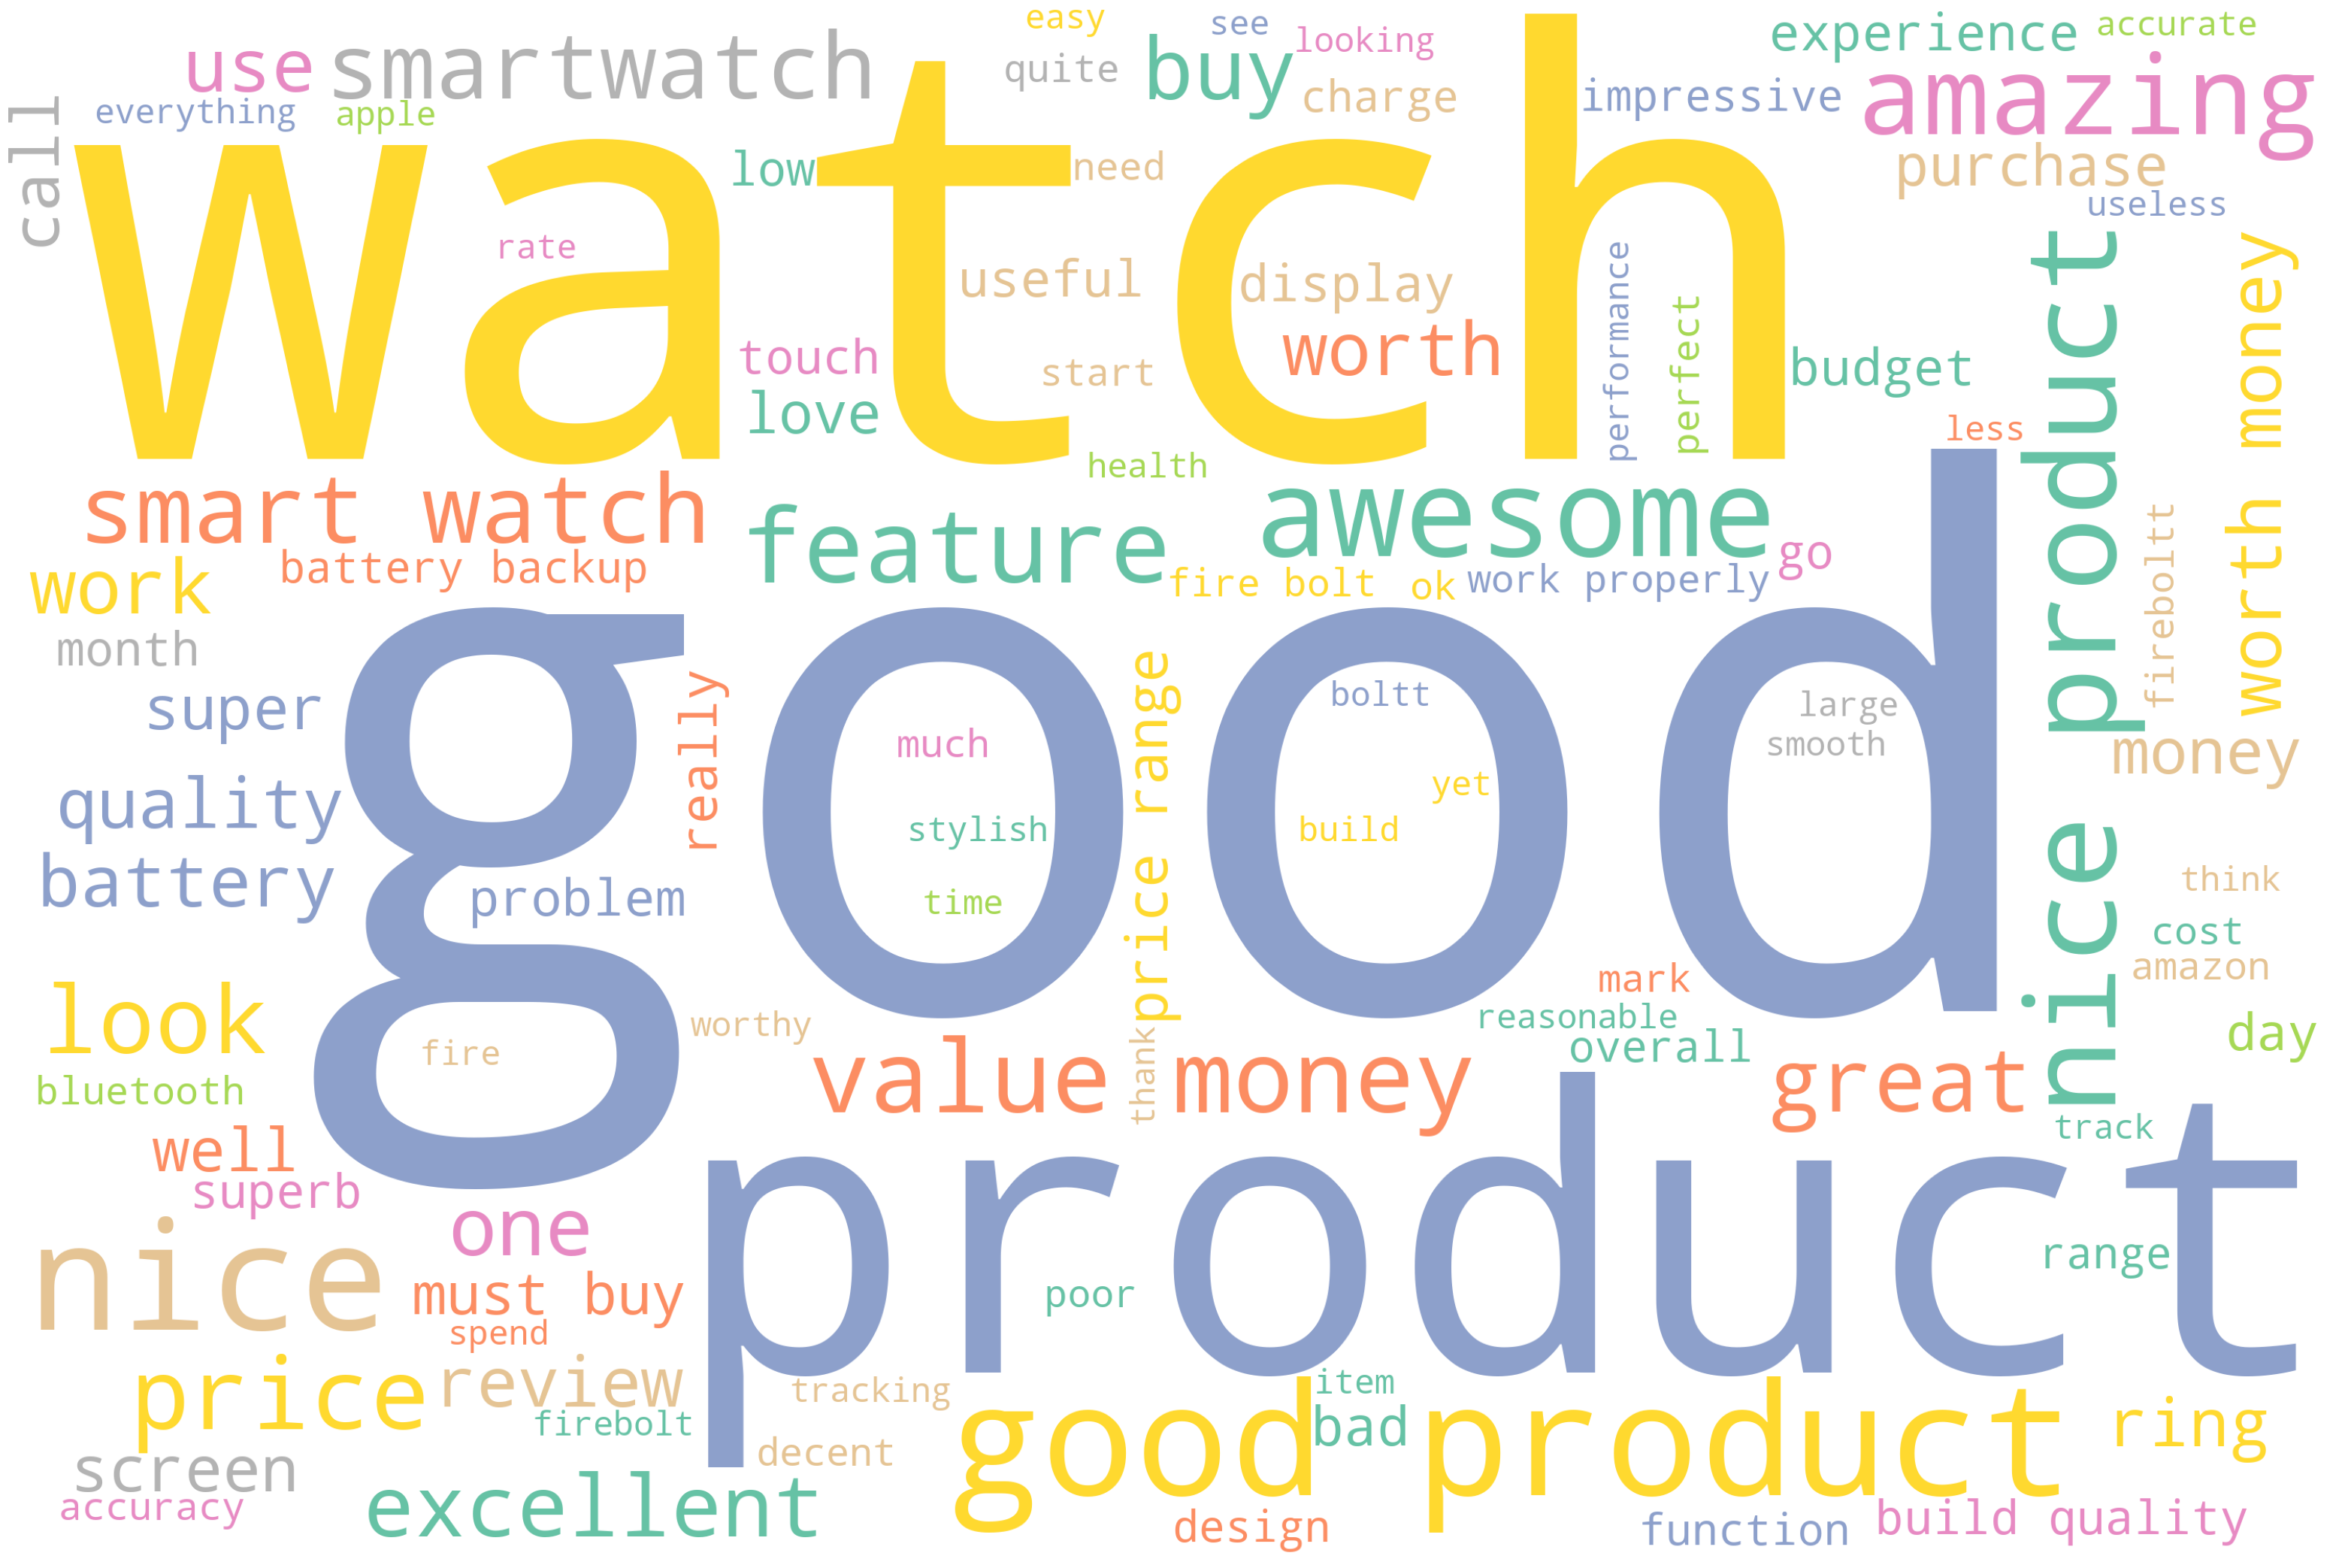

In [45]:
# Define a function to plot word cloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognization

In [46]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [47]:
for token in doc_block[100:200]:
    print(token,token.pos_)

accurate ADJ
very ADV
nice ADJ
look VERB
super ADV
smart ADJ
watch VERB
good ADJ
smartwatch NOUN
great ADJ
looking NOUN
' PUNCT
really ADV
awesome ADJ
nice ADJ
watch VERB
its PRON
good ADJ
product NOUN
use VERB
love NOUN
❣ PROPN
️ X
great ADJ
product NOUN
stylish ADJ
one NUM
good ADJ
value NOUN
money NOUN
watch VERB
awesome ADJ
feature NOUN
mind NOUN
blow NOUN
purchase NOUN
really ADV
good ADJ
smartwatch NOUN
good ADJ
smart ADJ
watch NOUN
ever ADV
very ADV
good ADJ
product NOUN
lovely ADJ
large ADJ
display NOUN
smartwatch NOUN
from ADP
fire NOUN
bolty PROPN
❣ PROPN
️ X
its PRON
good ADJ
price NOUN
range NOUN
ring NOUN
3 NUM
review VERB
nice ADJ
product NOUN
good ADJ
product NOUN
not PART
able ADJ
to PART
wrtite VERB
at ADP
this DET
stage NOUN
good ADJ
mid ADJ
range NOUN
watch NOUN
charge NOUN
happen VERB
awesome ADJ
product NOUN
👍 PUNCT
amazing ADJ
watch NOUN
see VERB
all DET
battery NOUN
good ADJ
watch NOUN
have AUX
many ADJ
function NOUN
track VERB
healthy ADJ
lifestyle NOUN
good ADJ

In [48]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['shin', 'look', 'feature', 'product', 'watch', 'watch', 'get', 'charge', 'wire', 'shop', 'money', 'spend', 'product', 'watch', 'battery', 'backup', 'product', 'buy', 'product', 'start', 'advertise', 'battery', 'capacity', 'product', 'decision', 'buy', 'item', 'boltt', 'ring', 'product', 'value', 'money', 'watch', 'charge', 'company', 'respond', 'month', 'battery', 'charge', 'get', 'switch', 'performance', 'love', 'feature', 'call', 'money', 'watch', 'packaging', 'product', 'productdont', 'buy', 'watch', 'register', 'warranty', 'watch', 'brand', 'watch', 'expectation', 'product', 'money', 'product', 'money', 'apple', 'watch', 'buy', 'product', 'colati', 'product', 'buy', 'product', 'accuracy', 'service', 'amazon', 'health', 'tracking', 'system', 'battery', 'life', 'money', 'product', 'review', 'fireboltt', 'ring', 'product', 'buy', 'product', 'dail', 'need', 'priemum', 'watch', 'price', 'product', 'looking', 'watch', 'review', 'watch', 'feature', 'use', 'amount', 'product']


In [49]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,191
1,watch,142
2,money,54
3,price,36
4,value,30
5,buy,29
6,feature,29
7,look,24
8,smartwatch,23
9,work,20


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

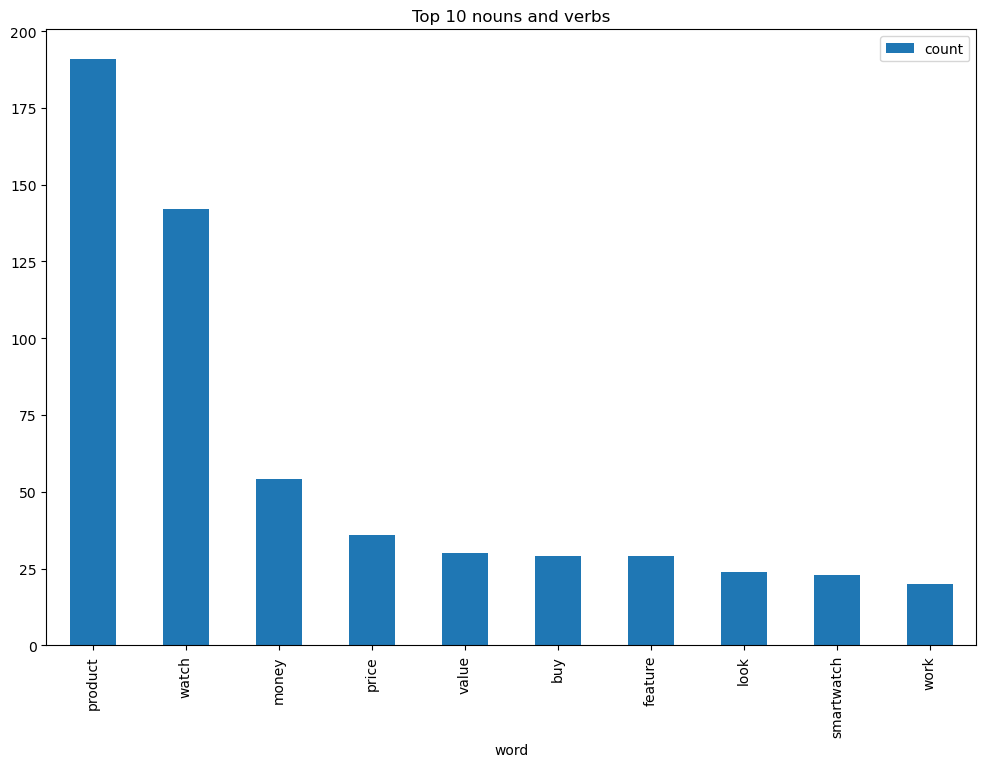

In [50]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

# Emotion Mining - Sentiment Analysis

In [51]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Nice watch Fire bolt watch Very impressive Good watch Awesome one Not good Good Smartwatch but gps tracking missing Great reviews Picture Not worth purchasing Nice Watch.',
 'The screen is 1.8 inch larger Good Product must buy Loved it.',
 "Must Try Watch Review Speaker Problem Satisfactory good for budget watch Awesome Amazon 🔥 bolt ring 3 nice product Osm product Product Quality Awesome Product Amazing and value for money product Value for Money Nice product, worth of money Amazing product Good Product Awesome good looking Just started to use, looks good as of now Superb product A GOOD PRODUCT LIKE IT VERY MUCH BUT ONLY ONE PROBLEM I SEE THAT THE SLEEP TRACKING IS NOT ACCURATE Very Nice looking Super smart watch Best smartwatch Great looking It’s really awesome nice watch It's a good product to use loved it ❣️ Great product Stylish one Good value for money watch with awesome features.",
 "Mind blowing purchase Really good smartwatch Best smart watch ever Very good product Lovely La

In [52]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Nice watch Fire bolt watch Very impressive Goo...
1,The screen is 1.8 inch larger Good Product mus...
2,Must Try Watch Review Speaker Problem Satisfac...
3,Mind blowing purchase Really good smartwatch B...
4,Good watch Difficult to get charging wire in s...
...,...
89,It's my first time experience Good Watch Aweso...
90,Look Awesome Worth buying Nice product Value f...
91,Probably the best smartwatch ever Good Product...
92,Mind blowing watch with fabulous colour qualit...


In [53]:
# Emotion Lexicon - Affin
from afinn import Afinn
afinn = Afinn()
nlp=spacy.load('en_core_web_sm')

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=afinn.score(word.lemma_)
    return sent_score

In [54]:
# manual testing
calculate_sentiment(text='good service')

3.0

In [55]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     23.0
1      6.0
2     84.0
3     52.0
4     54.0
      ... 
89    28.0
90    17.0
91    11.0
92    36.0
93     0.0
Name: sentiment_value, Length: 94, dtype: float64

In [56]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      27
1      12
2     113
3      96
4     112
     ... 
89     35
90     19
91     15
92     47
93      2
Name: word_count, Length: 94, dtype: int64

In [57]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
72,Disappointed.,-2.0,1
24,Disappointed l!!,-2.0,2
93,Ring 3,0.0,2
53,Just go for it.,0.0,4
31,Value for money.,0.0,3
...,...,...,...
75,Good Nothing Excellent Watch wit Multiple feat...,64.0,75
6,Worth of money Same as apple watch so its cool...,72.0,130
2,Must Try Watch Review Speaker Problem Satisfac...,84.0,113
10,accuracy I haven't check yet Good To improve B...,101.0,114


In [58]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count     94.000000
mean      20.478723
std       21.634664
min       -2.000000
25%        6.000000
50%       12.000000
75%       28.750000
max      114.000000
Name: sentiment_value, dtype: float64

In [59]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
9,Though work well.,0.0,3
20,A lot of glitches.,0.0,4
24,Disappointed l!!,-2.0,2
31,Value for money.,0.0,3
53,Just go for it.,0.0,4
63,Ore feedback.,0.0,2
72,Disappointed.,-2.0,1
93,Ring 3,0.0,2


In [60]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Nice watch Fire bolt watch Very impressive Goo...,23.0,27
1,The screen is 1.8 inch larger Good Product mus...,6.0,12
2,Must Try Watch Review Speaker Problem Satisfac...,84.0,113
3,Mind blowing purchase Really good smartwatch B...,52.0,96
4,Good watch Difficult to get charging wire in s...,54.0,112
...,...,...,...
88,Good product All in all good watch Good Wortha...,10.0,14
89,It's my first time experience Good Watch Aweso...,28.0,35
90,Look Awesome Worth buying Nice product Value f...,17.0,19
91,Probably the best smartwatch ever Good Product...,11.0,15


In [61]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Nice watch Fire bolt watch Very impressive Goo...,23.0,27,0
1,The screen is 1.8 inch larger Good Product mus...,6.0,12,1
2,Must Try Watch Review Speaker Problem Satisfac...,84.0,113,2
3,Mind blowing purchase Really good smartwatch B...,52.0,96,3
4,Good watch Difficult to get charging wire in s...,54.0,112,4
...,...,...,...,...
89,It's my first time experience Good Watch Aweso...,28.0,35,89
90,Look Awesome Worth buying Nice product Value f...,17.0,19,90
91,Probably the best smartwatch ever Good Product...,11.0,15,91
92,Mind blowing watch with fabulous colour qualit...,36.0,47,92


C:\Users\kavam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

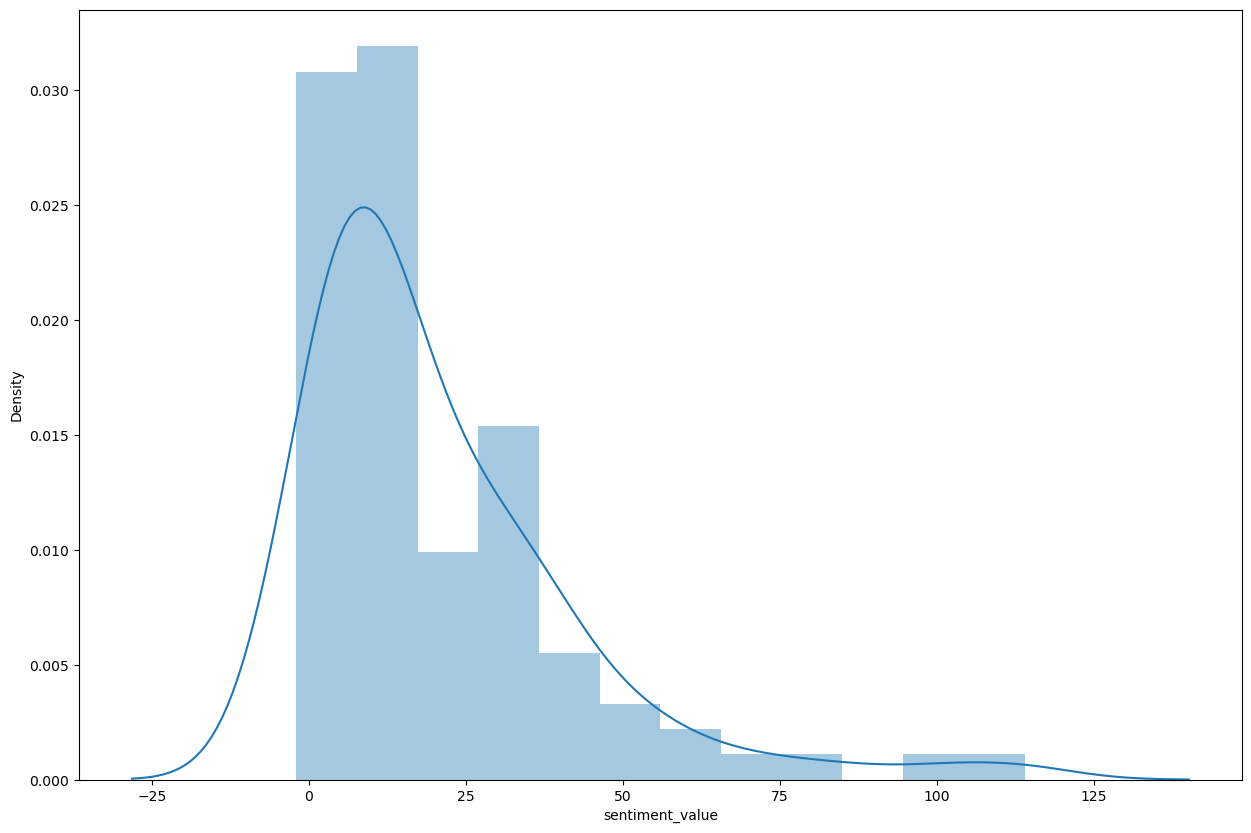

In [62]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

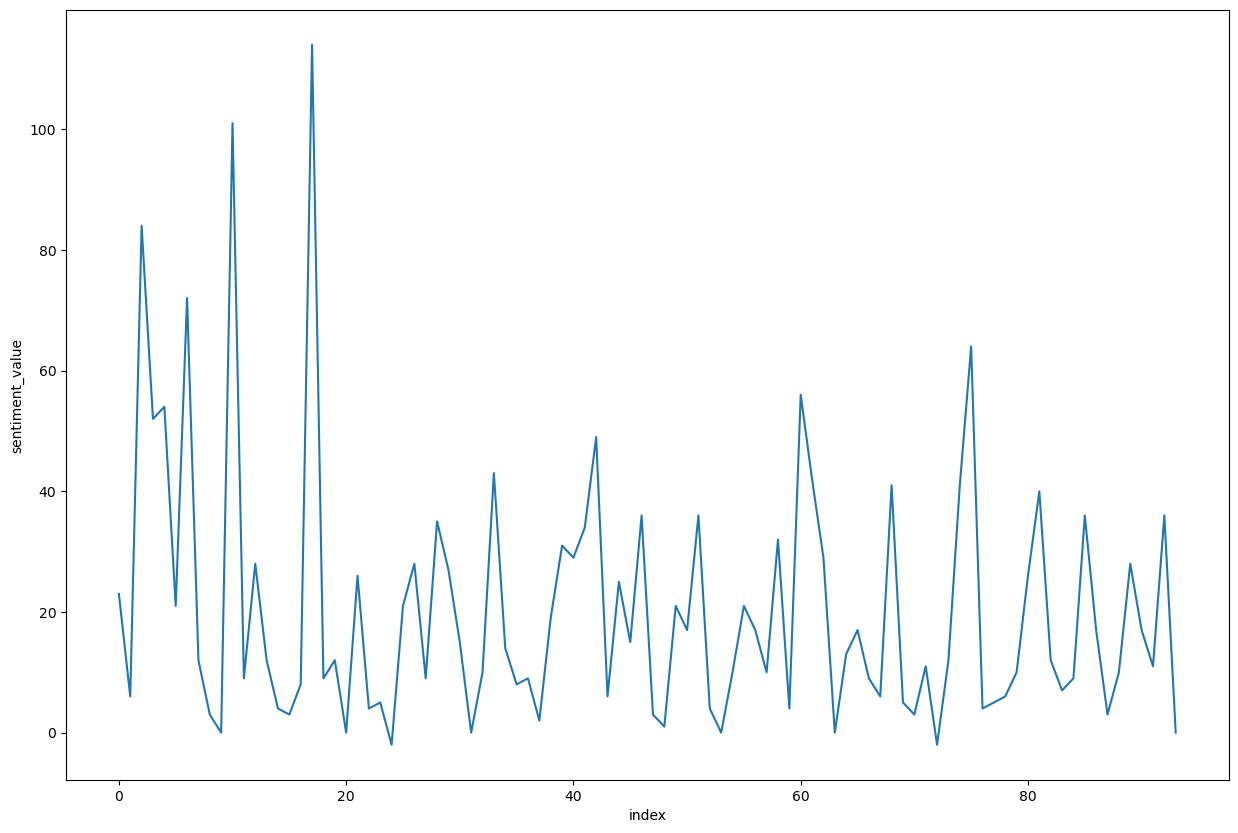

In [63]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)